# Lab 4: Data Cleaning and Filtering with Time Series Data

In this lab session, you will learn foundational techniques in data cleaning, filtering, and visualization. These skills are essential for analyzing environmental data collected from sensors in agricultural systems.

### What you will learn:
- How to create a time-indexed DataFrame
- How to identify and handle missing values
- How to apply Boolean filters to extract specific data
- How to visualize raw and processed data using Matplotlib
- How to apply your knowledge through hands-on exercises

## 1. Creating a Time Series DataFrame with an Index Column

In this section, we create a simple dataset that simulates sensor readings taken daily over a period of 10 days. The dataset includes Temperature (°C), Humidity (%), and CO2 concentration (ppm), with some missing values. We use `pandas.date_range` to generate timestamps and set them as the index of the DataFrame.

In [1]:
import numpy as np
import pandas as pd

# Increase the number of days to 90
date_rng = pd.date_range(start='2024-01-01', periods=90, freq='D')

# Generate fluctuating sensor data with some missing values
np.random.seed(42)
temperature = 25 + 5 * np.sin(np.linspace(0, 6 * np.pi, 90)) + np.random.normal(0, 1, 90)
humidity = 55 + 10 * np.cos(np.linspace(0, 6 * np.pi, 90)) + np.random.normal(0, 2, 90)
co2 = 400 + 30 * np.sin(np.linspace(0, 3 * np.pi, 90)) + np.random.normal(0, 5, 90)

# Introduce missing values randomly
temperature[np.random.choice(90, 10, replace=False)] = np.nan
humidity[np.random.choice(90, 10, replace=False)] = np.nan
co2[np.random.choice(90, 10, replace=False)] = np.nan

data = {
    'Date': date_rng,
    'Temperature': temperature,
    'Humidity': humidity,
    'CO2': co2
}

df = pd.DataFrame(data)
df.set_index('Date', inplace=True)
df

,Temperature,Humidity,CO2
Date,,,
2024-01-01,25.496714,65.194155,403.128337
2024-01-02,25.912800,66.713846,398.885169
2024-01-03,27.702847,62.712104,400.951926
2024-01-04,29.490440,62.393148,NaN
2024-01-05,28.512898,60.836842,411.213638
...,...,...,...
2024-03-26,NaN,63.275425,406.092036
2024-03-27,22.947992,63.074476,NaN
2024-03-28,NaN,67.023279,399.155681


## 2. Handling Missing Data

Sensor data often contains missing values (e.g., due to disconnection or sensor failure). We can use the `isna()` function to check for missing data and `fillna()` to replace them.

- `df.isna()` returns a DataFrame indicating which values are missing.
- `df.isna().sum()` shows how many missing values are in each column.
- `df.fillna(df.mean())` replaces missing values with the mean of each column.

In [2]:
df.isna()

,Temperature,Humidity,CO2
Date,,,
2024-01-01,False,False,False
2024-01-02,False,False,False
2024-01-03,False,False,False
2024-01-04,False,False,True
2024-01-05,False,False,False
...,...,...,...
2024-03-26,True,False,False
2024-03-27,False,False,True
2024-03-28,True,False,False


In [3]:
df.isna().sum()

Temperature    10
Humidity       10
CO2            10
dtype: int64

In [4]:
df_filled = df.fillna(df.mean(numeric_only=True))
df_filled

,Temperature,Humidity,CO2
Date,,,
2024-01-01,25.496714,65.194155,403.128337
2024-01-02,25.912800,66.713846,398.885169
2024-01-03,27.702847,62.712104,400.951926
2024-01-04,29.490440,62.393148,406.708093
2024-01-05,28.512898,60.836842,411.213638
...,...,...,...
2024-03-26,24.951104,63.275425,406.092036
2024-03-27,22.947992,63.074476,406.708093
2024-03-28,24.951104,67.023279,399.155681


## 3. Filtering Rows Using Conditions

We often want to focus on data that meets specific criteria. For example, we might be interested in periods when the temperature exceeded 25°C.

- `df['Temperature'] > 25` creates a Boolean Series
- `df[df['Temperature'] > 25]` returns the rows that meet this condition
- Combine multiple conditions using `&` (AND) or `|` (OR)

**Note:** Wrap each condition in parentheses when combining them.

In [5]:
df[df['Temperature'] > 25]

,Temperature,Humidity,CO2
Date,,,
2024-01-01,25.496714,65.194155,403.128337
2024-01-02,25.912800,66.713846,398.885169
2024-01-03,27.702847,62.712104,400.951926
2024-01-04,29.490440,62.393148,NaN
2024-01-05,28.512898,60.836842,411.213638
2024-01-07,31.355837,58.547822,420.170649
2024-01-08,30.747979,56.403435,419.892715
2024-01-09,29.492415,53.777910,418.248342
2024-01-10,30.264055,51.239937,416.881642


In [6]:
df[(df['Temperature'] > 25) & (df['Humidity'] > 55)]

,Temperature,Humidity,CO2
Date,,,
2024-01-01,25.496714,65.194155,403.128337
2024-01-02,25.912800,66.713846,398.885169
2024-01-03,27.702847,62.712104,400.951926
2024-01-04,29.490440,62.393148,NaN
2024-01-05,28.512898,60.836842,411.213638
2024-01-07,31.355837,58.547822,420.170649
2024-01-08,30.747979,56.403435,419.892715
2024-02-01,28.245539,62.785146,401.456033
2024-02-02,27.358066,66.609153,397.432462


## 4. Visualizing the Original and Filled Data

Plotting the raw data helps us detect trends and anomalies. By using `subplots=True`, we can see each sensor value in a separate graph. We will visualize the original data and compare it to the filled (cleaned) version.

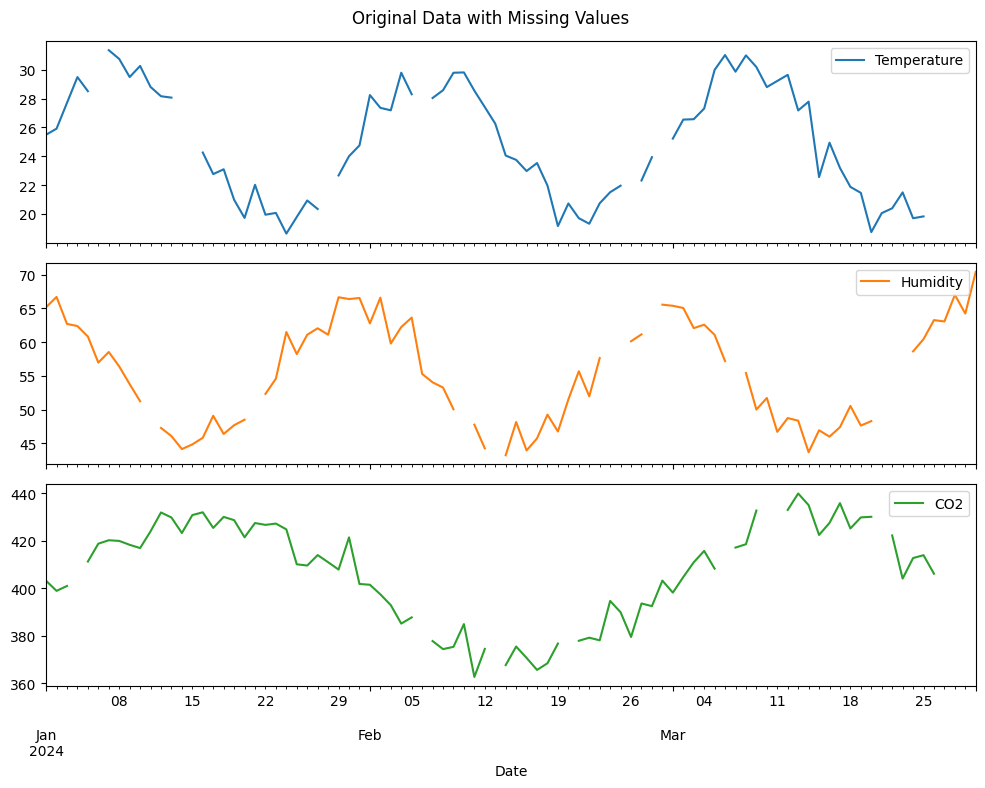

In [8]:
import matplotlib.pyplot as plt
# Plot the original data with missing values
df.plot(subplots=True, figsize=(10, 8), title='Original Data with Missing Values')
plt.tight_layout()
plt.show()

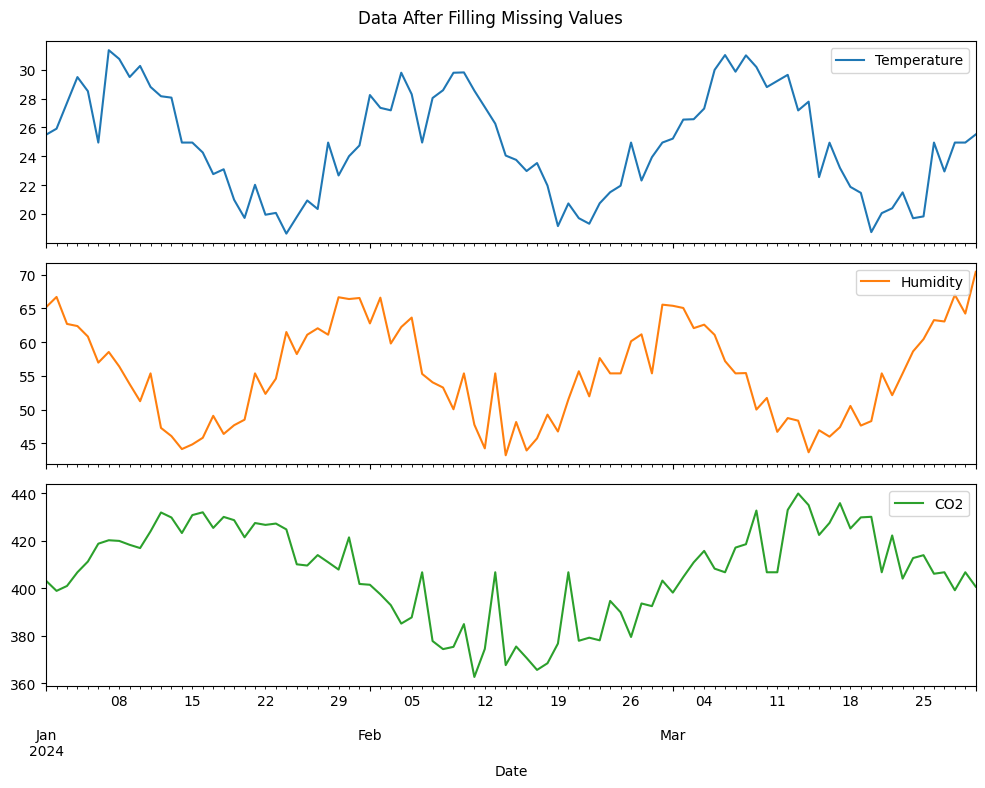

In [9]:
# Plot the filled data to see how missing values were handled
df_filled.plot(subplots=True, figsize=(10, 8), title='Data After Filling Missing Values')
plt.tight_layout()
plt.show()

## 5. Visualizing Filtered Data

We can also visualize the subset of data that meets specific criteria. Here, we filter rows with `Temperature > 25°C` and plot only those values. The `style='o-'` option plots both lines and markers.

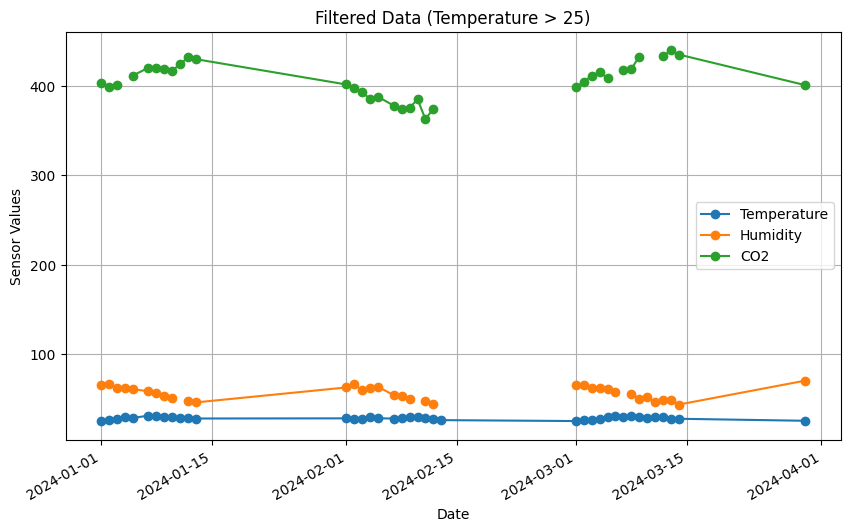

In [10]:
filtered_df = df[df['Temperature'] > 25]
filtered_df.plot(style='o-', figsize=(10, 6), title='Filtered Data (Temperature > 25)')
plt.ylabel('Sensor Values')
plt.xlabel('Date')
plt.grid(True)
plt.show()

## 6. Understanding Moving Average for Time Series Smoothing

A **moving average** is a technique used to smooth out short-term fluctuations and highlight longer-term trends in time series data. It is commonly used in sensor data analysis to reduce noise and make patterns more visible.

### How Moving Average Works

- The moving average calculates the mean of a fixed number of consecutive data points (called the "window").
- As the window slides over the data, each point in the smoothed series is the average of its neighbors.
- For example, a window size of 3 means each value is replaced by the average of itself and the two adjacent values.

### Why Use Moving Average?

- **Noise Reduction:** Smooths out random spikes or drops caused by sensor errors.
- **Trend Detection:** Makes it easier to see overall patterns, such as gradual increases or decreases.
- **Data Preparation:** Useful before applying further analysis or machine learning.

### Example: Calculating Moving Average in Pandas

You can use the `.rolling(window).mean()` method to compute the moving average for any column in your DataFrame.


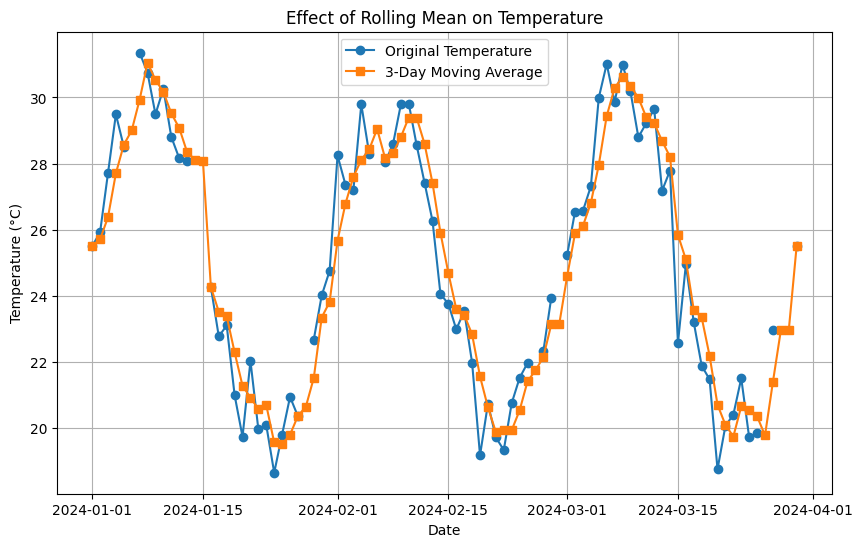

In [11]:
# Demonstrate the effect of rolling().mean() for smoothing time series data

# Calculate a 3-day moving average for Temperature
rolling_temp = df['Temperature'].rolling(window=3, min_periods=1).mean()

# Plot original vs. smoothed Temperature
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Temperature'], label='Original Temperature', marker='o')
plt.plot(df.index, rolling_temp, label='3-Day Moving Average', marker='s')
plt.title('Effect of Rolling Mean on Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Explanation:
# The rolling mean smooths out short-term fluctuations in the data.
# Notice how the moving average line is less jagged and follows the overall trend,
# making it easier to see gradual changes and patterns.

## 7. Resampling Time Series Data

Resampling is a powerful technique for changing the frequency of your time series data. It allows you to aggregate data into larger or smaller time intervals, such as converting daily sensor readings into weekly or monthly averages.

### Why Resample?

- **Reduce Data Volume:** Summarize high-frequency data for easier analysis.
- **Reveal Trends:** Smooth out short-term fluctuations by aggregating over longer periods.
- **Align Data:** Match the frequency of different datasets for comparison.

### How to Resample in Pandas

Use the `.resample()` method with a time-based frequency string (e.g., `'W'` for weekly, `'M'` for monthly) and an aggregation function like `.mean()` or `.sum()`.

#### Example: Weekly Average


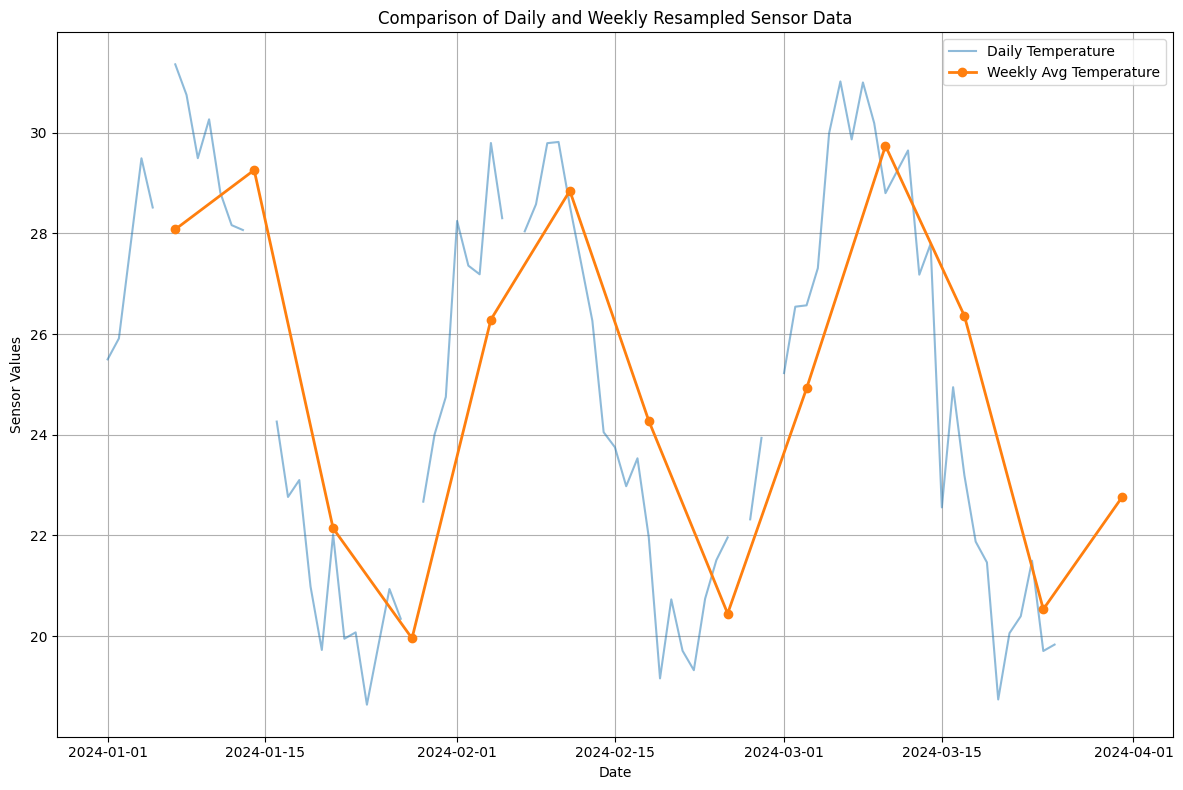

In [13]:
# Resample the time series data to weekly frequency and calculate the mean for each week
weekly_avg = df.resample('W').mean(numeric_only=True)

# Plot the weekly average for Temperature, Humidity, and CO2
# Plot original daily data and weekly resampled data for comparison
plt.figure(figsize=(12, 8))

plt.plot(df.index, df['Temperature'], label='Daily Temperature', alpha=0.5)
plt.plot(weekly_avg.index, weekly_avg['Temperature'], label='Weekly Avg Temperature', marker='o', linewidth=2)

# plt.plot(df.index, df['Humidity'], label='Daily Humidity', alpha=0.5)
# plt.plot(weekly_avg.index, weekly_avg['Humidity'], label='Weekly Avg Humidity', marker='o', linewidth=2)

# plt.plot(df.index, df['CO2'], label='Daily CO2', alpha=0.5)
# plt.plot(weekly_avg.index, weekly_avg['CO2'], label='Weekly Avg CO2', marker='o', linewidth=2)

plt.title('Comparison of Daily and Weekly Resampled Sensor Data')
plt.xlabel('Date')
plt.ylabel('Sensor Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. 📝 Exercises

Try the following on your own to reinforce what you've learned:

1. Fill missing values using **backward fill**:
   ```python
   df_bfill = df.fillna(method='bfill')
   ```

2. Create a new filter condition:
   - Temperature >= 24 AND CO2 < 430
   ```python
   your_filtered_df = df[(df['Temperature'] >= 24) & (df['CO2'] < 430)]
   ```

3. Visualize the filtered result using a line plot:
   ```python
   your_filtered_df.plot(style='o-')
   ```

4. Save the filtered DataFrame as a CSV file:
   ```python
   your_filtered_df.to_csv('filtered_result.csv')
   ```